In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

df= pd.read_csv("/kaggle/input/random-linear-regression/train.csv")
test_df= pd.read_csv('/kaggle/input/random-linear-regression/test.csv')


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df.columns
df.shape
df.head
# df = df.dropna(subset=['y'])
df.dropna(inplace=True)


<AxesSubplot: xlabel='x', ylabel='y'>

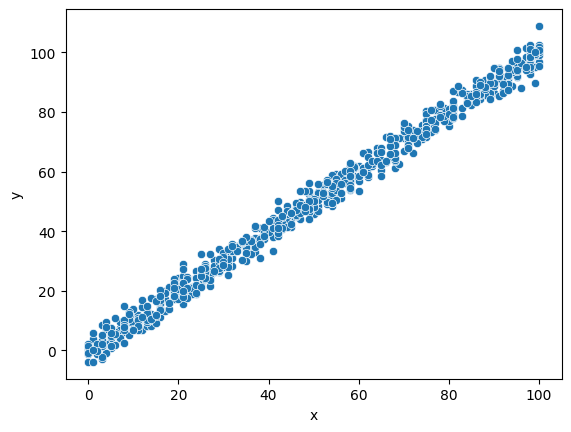

In [3]:
x= df['x'].values
x=np.array(x).reshape((-1,1))
y=df['y']
sns.scatterplot(data= df, x="x", y="y")


**Preparing test_df**


In [4]:
test_df_x= np.array(test_df['x']).reshape((-1,1))
test_df_y= np.array(test_df['y']).reshape((-1,1))

In [5]:
model= LinearRegression()
model.fit(x,y)
r_sq= model.score(x,y)
print( f'the value of the coefficient is: {model.coef_}')
print(f'the value of the intercept is:{model.intercept_}')
print(f"coefficient of determination: {r_sq}")

the value of the coefficient is: [1.00065638]
the value of the intercept is:-0.10726546430097272
coefficient of determination: 0.9907015319025518


In [6]:
pred=model.predict(test_df_x)
mse= mean_squared_error(pred, test_df_y)
mae= mean_absolute_error(pred,test_df_y)
print(f'The value of mean squared error is: {mse}')
print (f'The value of mean absolute error is: {mae}')

The value of mean squared error is: 9.432922192039305
The value of mean absolute error is: 2.415771850041258
